# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [90]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [40]:
df = pd.read_csv('../data/absences.csv', index_col=0)
df

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

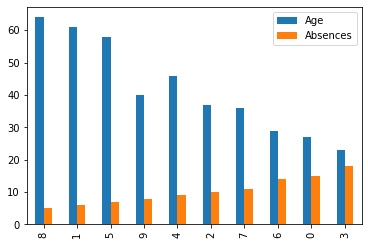

In [41]:
# your code here
aa = df[['Age','Absences']].sort_values(by=['Absences','Age'])
aa.plot.bar()

In [42]:
print(aa.groupby(by='Age').sum())

Absences
Age          
23         18
27         15
29         14
36         11
37         10
40          8
46          9
58          7
61          6
64          5


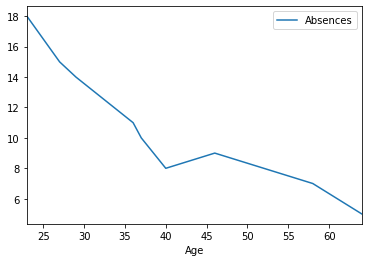

In [43]:
aa.groupby(by='Age').sum().plot()

In [44]:
# your comments here
"""
seems there is a direct relation between absences and age. This 2nd plot shows how direct the relation is.
"""

'\nseems there is a direct relation between absences and age. This 2nd plot shows how direct the relation is.\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [45]:
# your code here
# y = m*x + b
def calc_slope(point1, point2):
    """
    :point1 >> cord (x, y)
    :point2 >> cord (x, y)
    :return >> slope value
    """
    return (point2[1] - point1[1]) / (point2[0] - point1[0])

def calc_intercept_regression_line(point1, point2):
    """
    :point1 >> cord (x, y)
    :point2 >> cord (x, y)
    :return >> y value of intercept regression line
    """
    x_mean = (point1[0] + point2[0]) / 2
    y_mean = (point1[1] + point2[1]) / 2
    return y_mean - x_mean * calc_slope(point1, point2)


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [48]:
# your code here
res = [calc_intercept_regression_line((df.Age[pos], df.Absences[pos]),(df.Age[pos+1], df.Absences[pos+1])) for pos in range(0, len(df.Age), 2)]
res

[22.147058823529413,
 31.142857142857142,
 16.666666666666664,
 26.428571428571427,
 13.0]

In [73]:
slopes = []
for pos in range(len(df.Age)):
    for pos2 in range(pos, len(df.Age)):
        if pos2 > len(df.Age):
            continue

        val = calc_intercept_regression_line(
                (df.Age[pos], df.Absences[pos]),
                (df.Age[pos2], df.Absences[pos2]))
        if not np.isnan(val):
            slopes.append(val)
#print(slopes)
line_reg = []
for pos in range(len(df.Age)):
    for pos2 in range(pos, len(df.Age)):
        if pos2 > len(df.Age):
            continue
        #print('pos2:',pos2,' len:',len(df.Age))
        #print((df.Age[pos], df.Absences[pos]), (df.Age[pos2], df.Absences[pos2]))
        val = calc_intercept_regression_line(
                (df.Age[pos], df.Absences[pos]),
                (df.Age[pos2], df.Absences[pos2]))
        if not np.isnan(val):
            line_reg.append(val)

#print(line_reg)
m = np.mean(slopes)
b = np.mean(line_reg)

/Users/Cunillet/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [74]:
# create a two points to print a plot
# y = m*p + b
arr = []
# x = 0 >> y = b
arr.append((b, 0))
# x = 5 >> y = m*x + b
y = m * 5 + b
arr.append((y, 5))
# x = 10 >> y = m*x + b
y = m * 10 + b
arr.append((y, 10))
arr

[(23.624011827204804, 0), (141.74407096322884, 5), (259.86413009925286, 10)]

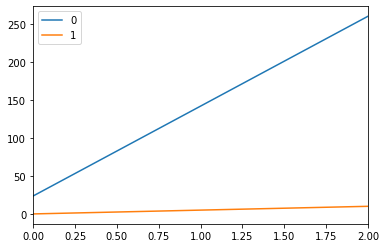

In [75]:
# plot line
line_df = pd.DataFrame(arr)
line_df.plot()

In [76]:
# your comments here
"""
this represents a line where numbers should get close to. Is as expected
"""

'\nthis represents a line where numbers should get close to. Is as expected\n'

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [ ]:
# your code here

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [ ]:
# your code here
def substract_mean(X):
    x_mean = np.mean(X)
    print(x_mean)
    
    return [elem - x_mean for elem in X]

def get_covar(X, Y):
    n = len(X)
    X = substract_mean(X)
    Y = substract_mean(Y)
    print(X)
    print(Y)
    sum1 = 0
    for x,y in zip(X,Y):
        print('x = ', x,' y = ', y)
        sum1 = sum1 + x*y
    # for sample population: 
    # return sum1 / (n-1)
    return sum1 / n

def correlation(X, Y):
    s_x = np.std(X) # ddof=0, for sample
    s_y = np.std(Y)
    print(s_x)
    print(s_y)
    return get_covar1(X,Y) / (s_x * s_y)

In [ ]:
# your comments here
"""
both have similar base on treating similar parts of function.
The difference is the divisor and further steps but most of them need a sum of all samples - mean.
"""

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [77]:
# your comments here
"""
as said in first instance, after seeing the graphyc, yes, there is a direct relation between those 2 params
"""

'\nas said in first instance, after seeing the graphyc, yes, there is a direct relation between those 2 params\n'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [78]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [79]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [80]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here
"""
there is a strong correlation in the same direction so the theory is not right
"""

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

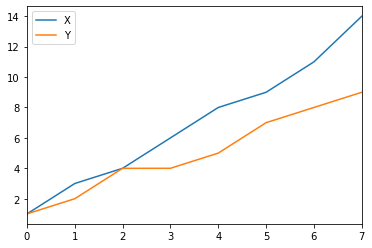

In [82]:
# your code here
ironbeers_df.plot()

In [ ]:
# your comments here
"""
seems large values get spread but they still go to the same side and with the same direction
"""

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

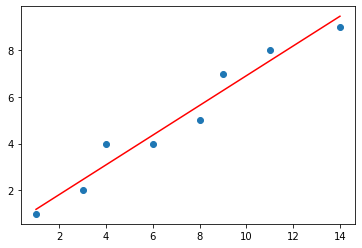

In [99]:
# your code here
linear_regressor = LinearRegression()
X = ironbeers_df.iloc[:, 0].values.reshape(-1, 1) # -1 means that calculate the dimension of rows, but have 1 column
Y = ironbeers_df.iloc[:, 1].values.reshape(-1, 1)
linear_regressor.fit(X, Y)
plt.scatter(ironbeers_df.X, ironbeers_df.Y)
Y_pred = linear_regressor.predict(X)
plt.plot(ironbeers_df.X, Y_pred, color='red')
plt.show()

In [ ]:
# your comments here
"""
seems values are really close and draw a clear line arround the linear regression
"""

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here